In [58]:
# ============================================
# Satellite Fuel Consumption Prediction
# Linear Regression (Beginner Friendly)
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# 2. Create a synthetic satellite dataset
# (Because real satellite fuel data is not public)
np.random.seed(42)

data={
    "Satellite_Mass":np.random.randint(500,3000,200),
    "Orbit_Altitude":np.random.randint(300,1200,200),
    "Mission_Duration":np.random.randint(30,1500,200),
    "Orbit_Corrections":np.random.randint(1,50,200)
}
df=pd.DataFrame(data)
df.head()

#Fuel Consumption formula (linear relationship)

df["Fuel_Consumption"]=(
    0.02*df["Satellite_Mass"]+
    0.01*df["Orbit_Altitude"]+
    0.05*df["Mission_Duration"]+
    2.5*df["Orbit_Corrections"]+
    np.random.randint(0,20,200)
)


In [59]:
#EDA
print("Dataset shape:",df.shape)
print(df.head())

Dataset shape: (200, 5)
   Satellite_Mass  Orbit_Altitude  ...  Orbit_Corrections  Fuel_Consumption
0            1360             702  ...                  5            109.62
1            1794             645  ...                 35            151.78
2            1630             810  ...                 23            116.35
3            1595             446  ...                 29            148.81
4            2138             447  ...                 43            242.48

[5 rows x 5 columns]


In [49]:
#4 Split features and target

X=df.drop("Fuel_Consumption",axis=1)
y=df["Fuel_Consumption"]

In [50]:
# Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
# 6 Train Linear Regression model
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [52]:
#7 Make predictions
y_pred=model.predict(X_test)

In [60]:
#8. Evaluate the model
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 40.107600777816664
Mean Absolute Error: 5.516038001979628
Root Mean Squared Error: 6.333056195693882


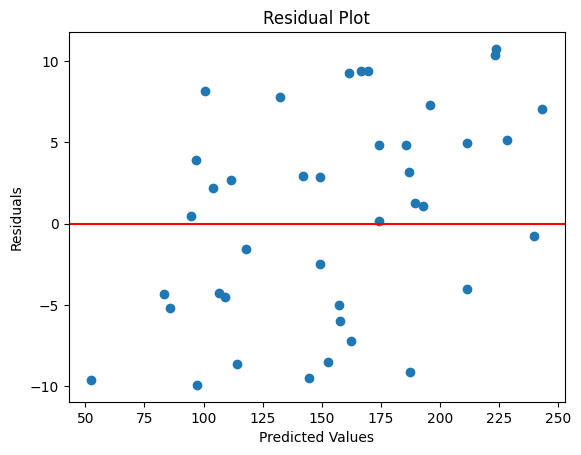

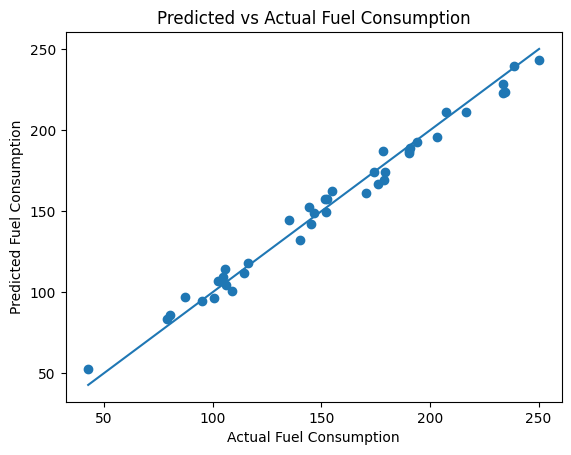

In [61]:
#9. Residual plot
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# -----------------------------
# 9. GRAPH 2: Residual Plot
# -----------------------------

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()]
         )
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Predicted vs Actual Fuel Consumption")
plt.show()

In [62]:
#10. interpret coeffients

coeff_df=pd.DataFrame({
    "Feature":X.columns,
    "Coefficient":model.coef_
}).sort_values(by="Coefficient",ascending=False)

print(coeff_df)


             Feature  Coefficient
3  Orbit_Corrections     2.481466
2   Mission_Duration     0.049605
0     Satellite_Mass     0.019398
1     Orbit_Altitude     0.009279


In [63]:
#11 Test with new satellite data(live prediction)

new_satellite=np.array([[1800,700,400,10]])
predicted_fuel=model.predict(new_satellite)
print("Predicted Fuel Consumption:",predicted_fuel[0])

Predicted Fuel Consumption: 97.71093706294155


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
